## 練習問題 (A)

### A-1, A-2

stimulus_object:
/sv (EArray(8100, 3, 128, 128), zlib(3)) ''
<class 'tables.earray.EArray'>
----
stimulus_array:
(type)
<class 'numpy.ndarray'>
(dtype)
uint8
----


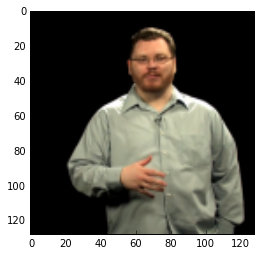

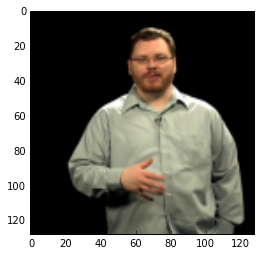

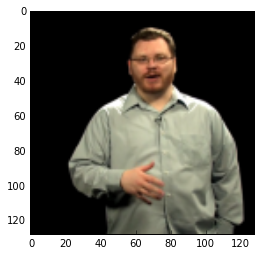

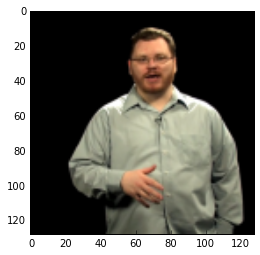

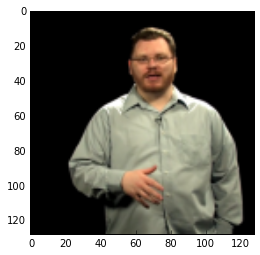

In [2]:
import numpy as np
import tables
import matplotlib
from matplotlib import pyplot as plt
import pprint as pp

# Open file connection.
f = tables.open_file("data/vim-2/Stimuli.mat", mode="r")

# Get object and array.
stimulus_object = f.get_node(where="/", name="sv")
print("stimulus_object:")
print(stimulus_object)
print(type(stimulus_object))
print("----")

stimulus_array = stimulus_object.read()
print("stimulus_array:")
#print(stimulus_array)
print("(type)")
print(type(stimulus_array))
print("(dtype)")
print(stimulus_array.dtype)
print("----")

'''
A-1: 向きの修正
'''
stimulus_array = np.swapaxes(stimulus_array, 3, 2)

num_frames = stimulus_array.shape[0]
num_channels = stimulus_array.shape[1]
frame_w = stimulus_array.shape[2]
frame_h = stimulus_array.shape[3]

frames_to_play = 5

oneframe = np.zeros(num_channels*frame_h*frame_w, dtype=np.uint8).reshape((frame_h, frame_w, num_channels))
im = plt.imshow(oneframe)

'''
A-2: 最後のフレームを取得
'''
for t in range(num_frames - frames_to_play, num_frames):
    oneframe[:,:,0] = stimulus_array[t,0,:,:] # red
    oneframe[:,:,1] = stimulus_array[t,1,:,:] # green
    oneframe[:,:,2] = stimulus_array[t,2,:,:] # blue
    plt.imshow(oneframe)
    plt.show()

f.close()

### A-3

In [ ]:
# Open file connection.
f = tables.open_file("data/vim-2/Stimuli.mat", mode="r")

# Get object and array.
'''
A-3: 
'''
stimulus_object = f.get_node(where="/", name="st")
print("stimulus_object:")
print(stimulus_object)
print(type(stimulus_object))
print("----")

stimulus_array = stimulus_object.read()
print("stimulus_array:")
#print(stimulus_array)
print("(type)")
print(type(stimulus_array))
print("(dtype)")
print(stimulus_array.dtype)
print("----")

stimulus_array = np.swapaxes(stimulus_array, 3, 2)

num_frames = stimulus_array.shape[0]
num_channels = stimulus_array.shape[1]
frame_w = stimulus_array.shape[2]
frame_h = stimulus_array.shape[3]

frames_to_play = 5

oneframe = np.zeros(num_channels*frame_h*frame_w, dtype=np.uint8).reshape((frame_h, frame_w, num_channels))
im = plt.imshow(oneframe)

for t in range(frames_to_play):
    oneframe[:,:,0] = stimulus_array[t,0,:,:] # red
    oneframe[:,:,1] = stimulus_array[t,1,:,:] # green
    oneframe[:,:,2] = stimulus_array[t,2,:,:] # blue
    plt.imshow(oneframe)
    plt.show()

f.close()

### A-4

In [ ]:
# Open file connection.
f = tables.open_file("data/vim-2/Stimuli.mat", mode="r")

# Get object and array.
stimulus_object = f.get_node(where="/", name="sv")
print("stimulus_object:")
print(stimulus_object)
print(type(stimulus_object))
print("----")

stimulus_array = stimulus_object.read()
print("stimulus_array:")
#print(stimulus_array)
print("(type)")
print(type(stimulus_array))
print("(dtype)")
print(stimulus_array.dtype)
print("----")

stimulus_array = np.swapaxes(stimulus_array, 3, 2)

num_frames = stimulus_array.shape[0]
num_channels = stimulus_array.shape[1]
frame_w = stimulus_array.shape[2]
frame_h = stimulus_array.shape[3]

frames_to_play = 100

oneframe = np.zeros(num_channels*frame_h*frame_w, dtype=np.uint8).reshape((frame_h, frame_w, num_channels))
im = plt.imshow(oneframe)

'''
A-4: 15枚につき1枚だけ取り出す
'''
for t in np.arange(0, frames_to_play, 15):
    oneframe[:,:,0] = stimulus_array[t,0,:,:] # red
    oneframe[:,:,1] = stimulus_array[t,1,:,:] # green
    oneframe[:,:,2] = stimulus_array[t,2,:,:] # blue
    plt.imshow(oneframe)
    plt.show()

f.close()

## 練習問題 (B)

### B-1

In [ ]:
from skimage import transform as trans
import imageio
import numpy as np
import tables
import matplotlib
from matplotlib import pyplot as plt
import pprint as pp

# Open file connection.
f = tables.open_file("data/vim-2/Stimuli.mat", mode="r")

# Get object and array.
stimulus_object = f.get_node(where="/", name="st")
stimulus_array = stimulus_object.read()
num_frames = stimulus_array.shape[0]
num_channels = stimulus_array.shape[1]

# Swap the axes.
print("stimulus array (before):", stimulus_array.shape)
stimulus_array = np.swapaxes(a=stimulus_array, axis1=0, axis2=3)
stimulus_array = np.swapaxes(a=stimulus_array, axis1=1, axis2=2)
print("stimulus array (after):", stimulus_array.shape)

# Downsampled height and width.
ds_h = 96
ds_w = 96

stimulus_array_ds = np.zeros(num_frames*num_channels*ds_h*ds_w,\
                             dtype=np.float32).reshape((ds_h, ds_w, num_channels, num_frames))

for t in range(num_frames):
    stimulus_array_ds[:,:,:,t] = trans.resize(image=stimulus_array[:,:,:,t],
                                              output_shape=(ds_h,ds_w),
                                              mode="reflect")
    if t % 500 == 0:
        print("Update: t =", t)
        
f.close()

print("(Pre-downsize) max:", np.max(stimulus_array),
      "min:", np.min(stimulus_array),
      "ave:", np.mean(stimulus_array))
print("(Post-downsize) max:", np.max(stimulus_array_ds),
      "min:", np.min(stimulus_array_ds),
      "ave:", np.mean(stimulus_array_ds))

fname = "data/vim-2/X_tr.dat"
dtype = stimulus_array_ds.dtype
shape = stimulus_array_ds.shape
with open(fname, mode="bw") as fbin:
    stimulus_array_ds.tofile(fbin)
    print("Saved to file.")
    
# Wipe the downsampled array.
stimulus_array_ds = np.zeros(num_frames*num_channels*ds_h*ds_w,\
                             dtype=np.float32).reshape((ds_h, ds_w, num_channels, num_frames))

# Load up the stored array.
with open(fname, mode="br") as fbin:
    print("Reading...", end=" ")
    stimulus_array_ds = np.fromfile(file=fbin, dtype=dtype).reshape(shape)
    print("OK.")

# Check a few frames.
num_frames = stimulus_array_ds.shape[3]

frames_to_play = 5

for t in range(frames_to_play):
    plt.imshow(stimulus_array_ds[:,:,:,t])
    plt.show()

stimulus array (before): (108000, 3, 128, 128)
stimulus array (after): (128, 128, 3, 108000)
Update: t = 0
Update: t = 500
Update: t = 1000
Update: t = 1500
Update: t = 2000
Update: t = 2500
Update: t = 3000
Update: t = 3500
Update: t = 4000
Update: t = 4500
Update: t = 5000
Update: t = 5500
Update: t = 6000
Update: t = 6500
Update: t = 7000
Update: t = 7500
Update: t = 8000
Update: t = 8500
Update: t = 9000
Update: t = 9500
Update: t = 10000
Update: t = 10500
Update: t = 11000
Update: t = 11500
Update: t = 12000
Update: t = 12500
Update: t = 13000
Update: t = 13500
Update: t = 14000
Update: t = 14500
Update: t = 15000
Update: t = 15500
Update: t = 16000
Update: t = 16500
Update: t = 17000
Update: t = 17500
Update: t = 18000
Update: t = 18500
Update: t = 19000
Update: t = 19500
Update: t = 20000
Update: t = 20500
Update: t = 21000
Update: t = 21500
Update: t = 22000
Update: t = 22500
Update: t = 23000
Update: t = 23500
Update: t = 24000
Update: t = 24500
Update: t = 25000
Update: t = 2

### B-2

* メリット  
入力に使用する特徴量が少なくなるため学習が早くなる。


* デメリット  
ダウンサンプリングは情報を捨ててしまうことと同義であり、ダウンサンプリングの度合いが大きくなるほど元の画像からの劣化が激しくなり、場合によっては学習精度の低下につながる。


## 練習問題 (C)

In [ ]:
import numpy as np
import tables
import matplotlib
from matplotlib import pyplot as plt
import pprint as pp

# Open file connection.
f = tables.open_file("data/vim-2/VoxelResponses_subject1.mat", mode="r")

# Get objects and arrays.

response_object = f.get_node(where="/", name="rv")
idx_object = f.get_node(where="/roi/", name="v4lh")

print("response_object:")
print(response_object)
print(type(response_object))
print("----")
print("idx_object:")
print(idx_object)
print(type(idx_object))
print("----")

response_array = response_object.read()
idx_array = idx_object.read()

print("response_array:")
#print(response_array)
print(type(response_array))
print("----")
print("idx_array:")
#print(idx_array)
print(type(idx_array))
print("----")

# Close the connection.
f.close()

# Check that it is closed.
if not f.isopen:
    print("Successfully closed.")
else:
    print("File connection is still open.")
    


### C-1

In [ ]:
nonzero_index_list = np.nonzero(idx_array)

for x, y, z in zip(nonzero_index_list[0], nonzero_index_list[1], nonzero_index_list[2]):
    print(x, y, z)

### C-2

In [ ]:
f = tables.open_file("data/vim-2/VoxelResponses_subject1.mat", mode="r")

idx_object_left = f.get_node(where="/roi/", name="v4lh")
idx_array_left = idx_object_left.read()

voxel_num_left = 1
for num in idx_array_left.shape:
    voxel_num_left *= num

print('Number of voxels in V4 =', voxel_num_left)

f.close()

### C-3

In [ ]:
f = tables.open_file("data/vim-2/VoxelResponses_subject1.mat", mode="r")

idx_object_left = f.get_node(where="/roi/", name="v4lh")
idx_array_left = idx_object_left.read()

idx_object_right = f.get_node(where="/roi/", name="v4lh")
idx_array_right = idx_object_right.read()

voxel_num_left = 1
for num in idx_array_left.shape:
    voxel_num_left *= num
    
voxel_num_right = 1
for num in idx_array_right.shape:
    voxel_num_right *= num

print('Number of voxels in V4 =', voxel_num_left + voxel_num_right)

f.close()

## C-4

ボクセルの数は被験者間で共通している。